In [1]:
import torch

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import random

In [4]:
from map_class import MapClass
from graph_class import Graph

In [5]:
#Training inputs for RGBcolors
rgb_colors = [[0., 0., 0.],
      [0., 0., 1.],
      [0., 0., 0.5],
      [0.125, 0.529, 1.0],
      [0.33, 0.4, 0.67],
      [0.6, 0.5, 1.0],
      [0., 1., 0.],
      [1., 0., 0.],
      [0., 1., 1.],
      [1., 0., 1.],
      [1., 1., 0.],
      [1., 1., 1.],
      [.33, .33, .33],
      [.5, .5, .5],
      [.66, .66, .66]]

In [6]:
color_names = \
    ['black', 'blue', 'darkblue', 'skyblue',
     'greyblue', 'lilac', 'green', 'red',
     'cyan', 'violet', 'yellow', 'white',
     'darkgrey', 'mediumgrey', 'lightgrey']

In [7]:
# Graph setup

In [8]:
amount_vertecies = 100
percent_edges = 0.5

In [9]:
graph1 = Graph()
matrix1 = graph1.create_matrix(amount_vertecies)
edges1 = graph1.generate_edges(amount_vertecies, percent_edges)
matrix1 = graph1.add_edges(matrix1, edges1)

5000


In [10]:
# Network configuration

data = rgb_colors
data_lables = color_names
batch_size = 2

length = 10
width = 10
number_epochs = 100
shuffle = True

learning_rate = 0.01

In [11]:
map1 = MapClass(data, length, width, learning_rate, number_epochs, matrix1, data_lables, batch_size, shuffle)

3
15


In [12]:
# map1.weights

In [13]:
# training, dim, number_rows_data = load_data(data, batch_size)

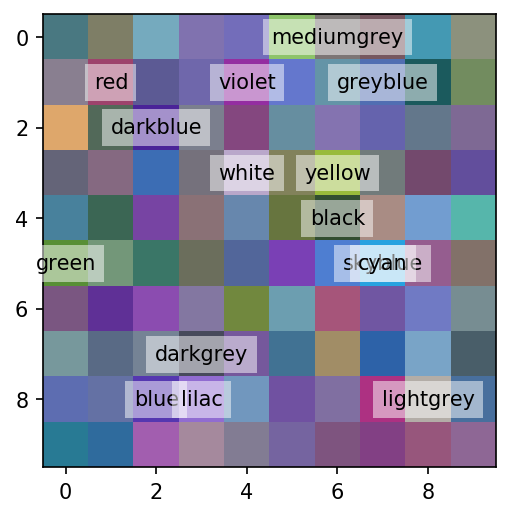

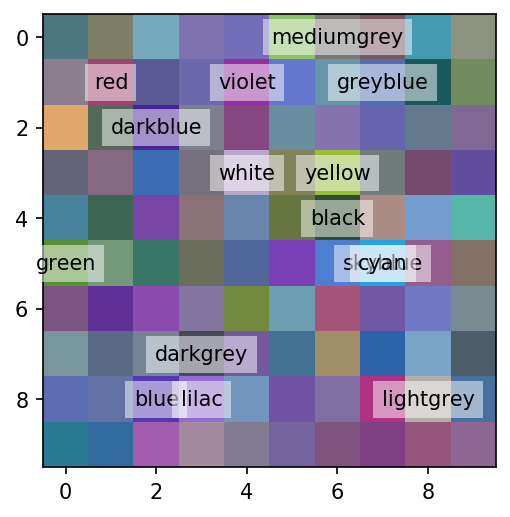

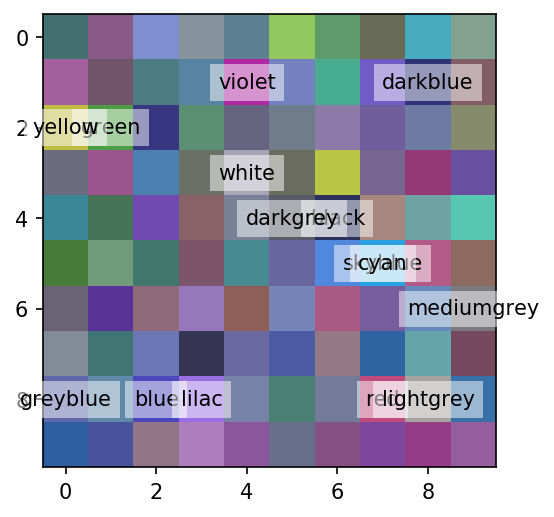

In [19]:
plt.rcParams['figure.dpi'] = 150
map1.large_cycle(draw_every_epoch=100, rgb=True)

In [ ]:
import matplotlib.patheffects as path_effects


text = plt.text(0.5, 0.5, 'Hello path effects world!',
                path_effects=[path_effects.withSimplePatchShadow()])

# plt.plot([0, 3, 2, 5], linewidth=5, color='blue',
#          path_effects=[path_effects.Normal()])
plt.show()